## Data visualization
### Understand the dataset by plotting

This is a low-dimensinoal digit recognition dataset. 

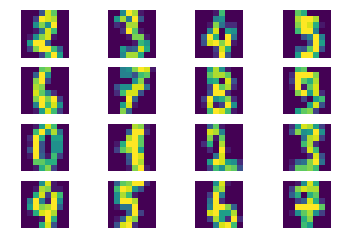

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


digits = load_digits()
X, y = digits.data, digits.target

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X[i+1].reshape((8,8)))
    plt.axis('off')

plt.show()

In [22]:
X.shape

(1797, 64)

### Training and Testing Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Classification Methods

1) Random Forest Method to this dataset and find the feature_importance coefficient and visualization of the feature importance matrix. 

2) SVM classifiers with linear kernel. With the coefficient matrix. Visualize coefficient for each class.

3) SVM with Gaussian kernel. GridSearchCV to find a good tuning parameter and find the feature_importance coefficient. 


[0.00000000e+00 7.06320509e-03 2.25541848e-02 1.38564033e-02
 1.28316325e-02 2.01956581e-02 1.47437169e-02 3.60006193e-03
 4.75412211e-04 1.57882462e-02 1.96625030e-02 1.09885867e-02
 1.95056814e-02 2.20704776e-02 1.17457743e-02 1.86359657e-03
 1.70336603e-04 1.44054789e-02 2.36331284e-02 2.19674268e-02
 2.70244205e-02 3.38648690e-02 1.46911362e-02 1.58944152e-03
 5.38823508e-05 1.85490422e-02 2.95982209e-02 2.91983877e-02
 2.48300839e-02 2.84091226e-02 2.40779057e-02 1.33553634e-04
 0.00000000e+00 2.37966571e-02 2.67893257e-02 2.03947546e-02
 2.82698367e-02 2.22109145e-02 2.08141263e-02 0.00000000e+00
 6.06931452e-04 1.36934714e-02 2.46748227e-02 3.26867421e-02
 2.39832286e-02 2.37552639e-02 1.75454276e-02 1.56018998e-03
 2.33345919e-04 6.60050140e-03 1.87947671e-02 2.06932349e-02
 1.71900315e-02 2.41215329e-02 2.00259273e-02 6.54889905e-03
 4.62679664e-05 8.13746317e-03 2.44950258e-02 1.60198741e-02
 2.44632647e-02 1.92586483e-02 1.75279261e-02 5.92001937e-03]


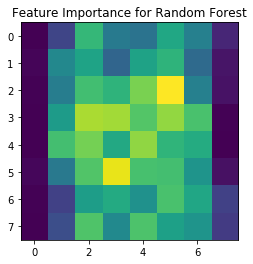

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 100, n_estimators=100, max_features=1, max_leaf_nodes=100)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(clf.feature_importances_)
plt.imshow(clf.feature_importances_.reshape((8,8)))
plt.title('Feature Importance for Random Forest')
plt.show()

[[ 0.00000000e+00 -1.24232602e-02  2.64472571e-03  1.03674403e-02
  -2.19206400e-02 -9.20966116e-02 -7.59737327e-02 -1.55695294e-03
   0.00000000e+00 -2.34087488e-02  5.56877320e-03  6.05860180e-02
   5.14362932e-02  6.01835543e-02  1.05900228e-02 -3.89238236e-03
  -8.33771897e-04  3.55050104e-02  4.53061853e-02 -1.11927204e-02
  -9.01898255e-02  8.03166107e-02 -1.40468808e-02 -5.86049959e-03
  -4.16885948e-04 -1.39385648e-02 -2.02416880e-02 -3.90104969e-02
  -1.56852897e-01  1.94198781e-03  1.63504621e-02  0.00000000e+00
   0.00000000e+00  8.22585354e-02  3.25956197e-02 -1.89337068e-02
  -1.33702477e-01 -4.55515819e-03 -2.89175066e-02  0.00000000e+00
   0.00000000e+00 -2.31362702e-03  3.27994995e-02 -6.31997002e-02
  -6.31801541e-02  5.67732023e-03  4.09893965e-02  0.00000000e+00
   0.00000000e+00 -4.01038937e-02  2.99262527e-03 -2.57527082e-02
   1.94292926e-02 -5.33071572e-03 -4.79733818e-02 -2.76703812e-02
   0.00000000e+00 -1.93557712e-02 -7.89985756e-02  2.33462474e-02
  -8.03461

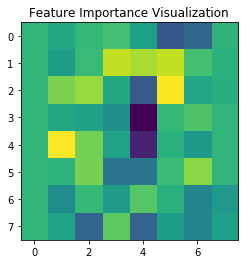

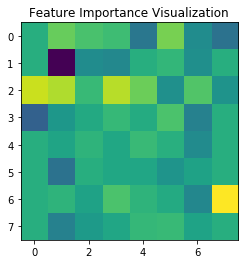

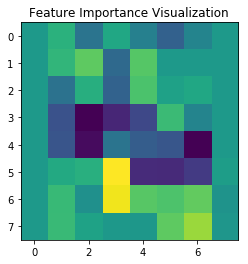

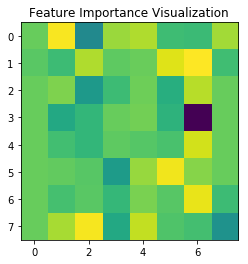

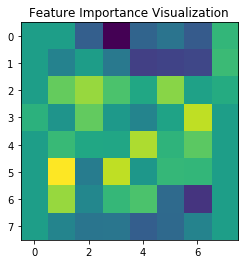

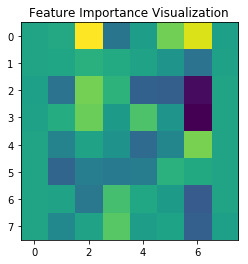

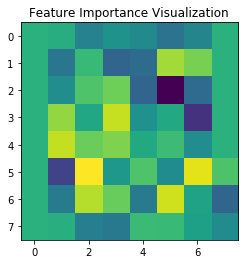

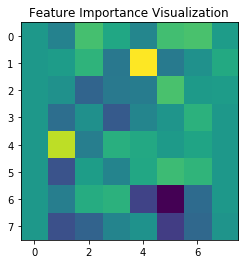

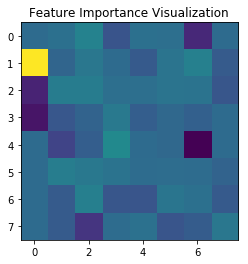

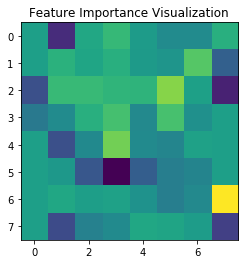

In [25]:
from sklearn.svm import LinearSVC
clf_svml = LinearSVC()
clf_svml.fit(X,y)
coeff = clf_svml.coef_
print(coeff)
for i in range(10):
    plt.imshow(coeff[i].reshape((8,8)))
    plt.title('Feature Importance Visualization')
    plt.show()

In [26]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
Cs = [0.01, 0.1, 1, 10, 100]
parameters = {'C':Cs}
clf_sv = svm.SVC(kernel='rbf')
clf_svm = GridSearchCV(clf_sv, parameters, return_train_score=True)
clf_svm.fit(X_train, y_train)
print('best parameters:',clf_svm.best_params_)
clf_svm = svm.SVC(kernel="rbf", gamma = 0.001, C = 10)
clf_svm.fit(X_train, y_train)

best parameters: {'C': 10}


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Plotting Learning Curves
We would like to plot the learning curve of the data. So, that we can train our model with the optimal training sample size.

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




The cross validation score is used as the metric to estimate the Learning Curves of the models. 

### Naive Bayes Classifier 

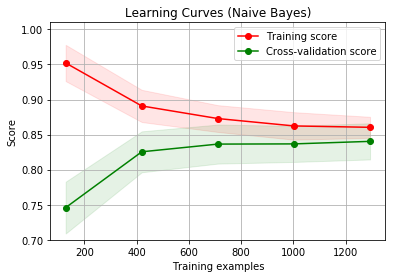

In [10]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


### Random Forest 

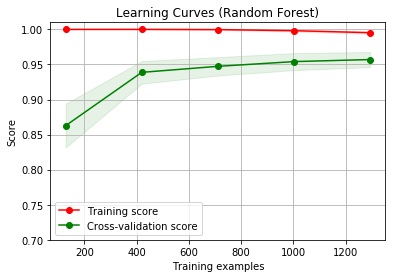

In [11]:
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### Linear SVM 

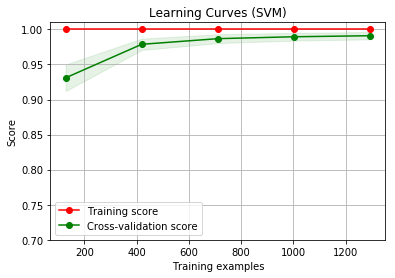

In [13]:
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(clf_svm, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### Logistic Regression 

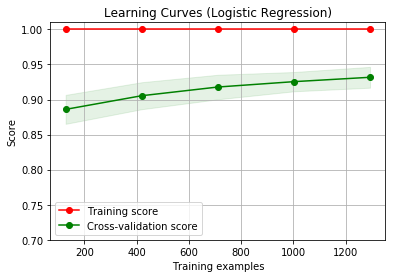

In [14]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(clf_l, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### MLP Classifier 

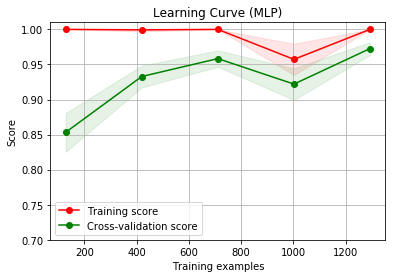

In [15]:
from sklearn.neural_network import MLPClassifier
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

clf_MLP = MLPClassifier(solver='adam',hidden_layer_sizes=100)
clf_MLP.fit(X_train,y_train)

title_MLP = "Learning Curve (MLP)"
plot_learning_curve(clf_MLP, title_MLP, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

### Convolutional Neural Networks
Please design a small CNN architecture on this dataset.

In [42]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical

model = Sequential()
model.add(Conv2D(64,kernel_size=(2, 2), activation='relu', input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(720, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

X_traincnn = X_train.reshape(-1,8, 8, 1)
y_traincnn = to_categorical(y_train)
X_testcnn = X_test.reshape(-1,8, 8, 1)
y_testcnn = to_categorical(y_test)

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_traincnn, y_traincnn, batch_size=64,epochs=8, validation_data=(X_testcnn, y_testcnn))

Train on 1617 samples, validate on 180 samples
Epoch 1/8
1617/1617 [==============================] - 7s 4ms/step - loss: 1.6192 - acc: 0.5015 - val_loss: 0.4387 - val_acc: 0.9056
Epoch 2/8
1617/1617 [==============================] - 2s 962us/step - loss: 0.5057 - acc: 0.8343 - val_loss: 0.1981 - val_acc: 0.9444
Epoch 3/8
1617/1617 [==============================] - 2s 936us/step - loss: 0.3278 - acc: 0.8949 - val_loss: 0.1253 - val_acc: 0.9667
Epoch 4/8
1617/1617 [==============================] - 2s 937us/step - loss: 0.2328 - acc: 0.9165 - val_loss: 0.1136 - val_acc: 0.9667
Epoch 5/8
1617/1617 [==============================] - 2s 981us/step - loss: 0.1746 - acc: 0.9419 - val_loss: 0.0727 - val_acc: 0.9722
Epoch 6/8
1617/1617 [==============================] - 2s 1ms/step - loss: 0.1406 - acc: 0.9561 - val_loss: 0.0668 - val_acc: 0.9778
Epoch 7/8
1617/1617 [==============================] - 2s 1ms/step - loss: 0.1376 - acc: 0.9586 - val_loss: 0.0401 - val_acc: 0.9889
Epoch 8/8
1617

### Conclusion 
Achieved a CNN Classification model with an accuracy of 97.28% 